In [1]:
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# 数据所在文件夹
base_dir = 'G:\dogs_and_cats'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
# 训练集
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# 验证集
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [3]:
## 构建神经网络模型
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPool2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPool2D(2, 2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPool2D(2, 2),

    # 为全连接层准备
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation='relu'),
    # tf.keras.layers.Dropout(rate=0.3),  # 添加dropout层 防止过拟合
    # 由于是二分类任务 使用sigmoid激活函数就够了
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 128)        0

In [5]:
# 数据预处理操作
train_datagen = ImageDataGenerator(rescale=1/255.#,  下面几个参数属于数据增强选项
                                    #rotation_range=40,
                                    #width_shift_range=0.3, height_shift_range=0.3,
                                    #shear_range=0.2,
                                    #zoom_range=0.2,
                                    #horizontal_flip=True
                                   )
test_datagen = ImageDataGenerator(rescale=1/255.)

In [6]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                  target_size=(64, 64),
                                  batch_size=250,
                                  # 如果是多分类问题就使用categorical
                                  class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                  target_size=(64, 64),
                                  batch_size=20,
                                  # 如果是多分类问题就使用categorical
                                  class_mode='binary')

Found 21798 images belonging to 2 classes.
Found 3202 images belonging to 2 classes.


In [7]:
# 训练网络模型

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss=tf.keras.losses.binary_crossentropy, metrics=['acc'])

with tf.device('/GPU') as f:
    history = model.fit(train_generator,
                    steps_per_epoch=50,  # images >= batch_size * steps
                    epochs=50,
                    validation_data=validation_generator,
                    validation_steps=20,  # images >= batch_size * steps
                    verbose=2)

Epoch 1/50
50/50 - 19s - loss: 0.6855 - acc: 0.5526 - val_loss: 0.6654 - val_acc: 0.6275 - 19s/epoch - 371ms/step
Epoch 2/50
50/50 - 17s - loss: 0.6394 - acc: 0.6468 - val_loss: 0.6084 - val_acc: 0.6300 - 17s/epoch - 336ms/step
Epoch 3/50
50/50 - 18s - loss: 0.6104 - acc: 0.6626 - val_loss: 0.6083 - val_acc: 0.6825 - 18s/epoch - 355ms/step
Epoch 4/50
50/50 - 15s - loss: 0.5865 - acc: 0.6876 - val_loss: 0.5652 - val_acc: 0.7100 - 15s/epoch - 309ms/step
Epoch 5/50
50/50 - 18s - loss: 0.5716 - acc: 0.7023 - val_loss: 0.5717 - val_acc: 0.7050 - 18s/epoch - 354ms/step
Epoch 6/50
50/50 - 18s - loss: 0.5540 - acc: 0.7195 - val_loss: 0.5708 - val_acc: 0.7225 - 18s/epoch - 360ms/step
Epoch 7/50
50/50 - 17s - loss: 0.5277 - acc: 0.7409 - val_loss: 0.5402 - val_acc: 0.7025 - 17s/epoch - 339ms/step
Epoch 8/50
50/50 - 18s - loss: 0.5201 - acc: 0.7453 - val_loss: 0.5134 - val_acc: 0.7575 - 18s/epoch - 357ms/step
Epoch 9/50
50/50 - 17s - loss: 0.4976 - acc: 0.7666 - val_loss: 0.4953 - val_acc: 0.7400

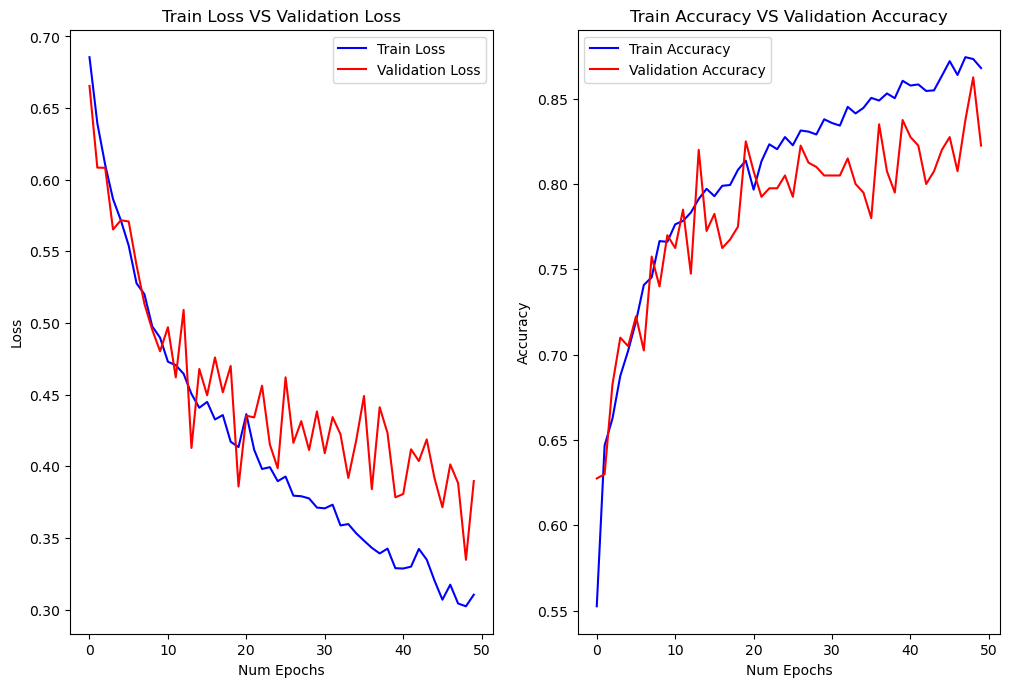

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8), dpi=100)
plt.rcParams['figure.facecolor'] = 'white'
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = history.epoch

train_acc = history.history['acc']
val_acc = history.history['val_acc']

plt.subplot(121)
plt.plot(epochs, train_loss, 'b-', label='Train Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.legend()
plt.xlabel('Num Epochs')
plt.ylabel('Loss')
plt.title('Train Loss VS Validation Loss')

plt.subplot(122)
plt.plot(epochs, train_acc, 'b-', label='Train Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.legend()
plt.xlabel('Num Epochs')
plt.ylabel('Accuracy')
plt.title('Train Accuracy VS Validation Accuracy')
plt.show()